In [21]:
from qiskit_aer import Aer, AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_state_qsphere

In [22]:
def execute_circuit(quantum_circuit: QuantumCircuit):
    simulator = AerSimulator()
    res = simulator.run(qc, shots=1024).result().get_counts()
    circuit_draw = quantum_circuit.draw()

    histogram = plot_histogram(res)
    return res, circuit_draw, histogram

## CNOT gate
Similar to XOR
first part is `Control` which is connected to one of the qubit and is what triggers the fate to perform an *operation* on the other qubit connected to the other end of the CNOT gate the `Target`

the operation on the other bit is `NOT` operation

It is commonly used to `entangle quibits`

We can thinkk of `X gate`
It is often called as Control-X (CX)


The matrix representation of a CNOT in 4x4 matrix
$$
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{bmatrix}
$$

> top left 2x2 represent a Identity matrix and the bottom right 2x2 represent a `X` matrix


> When the Control qubit (the left side of the input vector) is 0 there is no chg to the target qubit
> but if the control qubit is set to 1 then the target qubit operation is enabled and it rotates the target qubut around the x axis by $\pi$
|Input|Output|
|-|-|
| \|00> | \|00> |
| \|01> | \|01> |
| \|10> | \|11> |
| \|11> | \|10> |


In [23]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(control_qubit=0, target_qubit=1)
qc.measure_all() # measure all qubits and send res to classical bits
res, img, histogram = execute_circuit(qc)

In [24]:
res

{'11': 540, '00': 484}

In [25]:
img

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

So what is happening?

by default all quibits are in `|0>` so q_1 is always 0
when the H gate random decides to be `|0>` then the control bit is not in active state thus no result hence upon measureing both in the same state `|0>`
when the H decides to be `|1>` then control bit is activated and thus applies $\pi$ x axis rotate on the target which is at `|0>` thus making it `|1>` and then all in the same state `|1>`

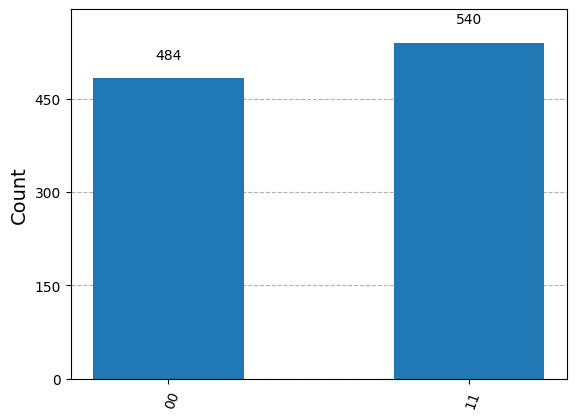

In [26]:
histogram

## Control Y
it is doing `Y gate` for the target

In [27]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cy(control_qubit=0, target_qubit=1)
qc.measure_all() # measure all qubits and send res to classical bits
res, img, histogram = execute_circuit(qc)

In [28]:
res

{'00': 508, '11': 516}

In [29]:
img

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ Y ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

So what is happening?

by default all quibits are in `|0>` so q_1 is always 0
when the H gate random decides to be `|0>` then the control bit is not in active state thus no result hence upon measureing both in the same state `|0>`
when the H decides to be `|1>` then control bit is activated and thus applies $\pi$ y axis rotate on the target which is at `|0>` thus making it `|1>` and then all in the same state `|1>`

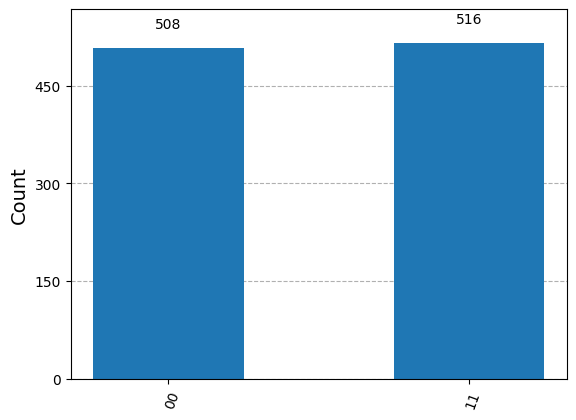

In [30]:
histogram

## Control Z

z gate as target

In [31]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cz(control_qubit=0, target_qubit=1)
qc.measure_all() # measure all qubits and send res to classical bits
res, img, histogram = execute_circuit(qc)

In [32]:
res

{'00': 501, '01': 523}

In [33]:
img

┌───┐    ░ ┌─┐   
   q_0: ┤ H ├─■──░─┤M├───
        └───┘ │  ░ └╥┘┌─┐
   q_1: ──────■──░──╫─┤M├
                 ░  ║ └╥┘
meas: 2/════════════╩══╩═
                    0  1

So what is happening?

by default all quibits are in `|0>` so q_1 is always 0
when the H gate random decides to be `|0>` then the control bit is not in active state thus no result hence upon measureing both in the same state `|0>`
when the H decides to be `|1>` then control bit is activated and thus applies $\pi$ z axis rotate on the target which is at `|0>` which is still `|0>` thus making $q_0$ = `|1>` and $q_1$ = `|0>` 

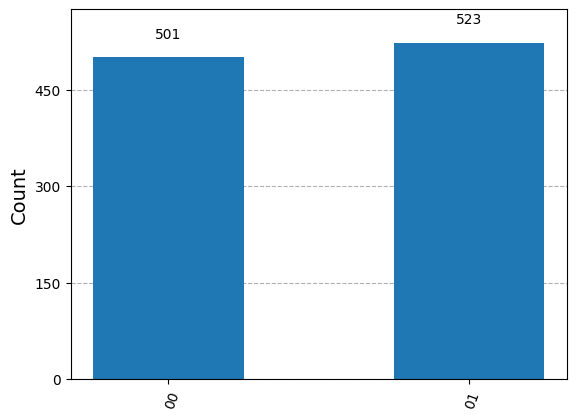

In [34]:
histogram

### Toffoli gate

It is similar to the CX but has more than one control gates
CCX, CCCX

the general matrix represenetation of a 8x8 matrix becuase of the tensor prouct of 3 qubits. is like first 3 diagonal 2x2 blocks are Identity and the last 2x2 is a not gate representation that flips the qubit.

> [!NOTE]
> this gate in the qiskit is slightly different but still produces the same result

In [48]:
qc = QuantumCircuit(3)

qc.ccx(control_qubit1=0, control_qubit2=1, target_qubit=2)
qc.save_statevector()
qc.measure_all() # measure all qubits and send res to classical bits
simulator = AerSimulator()
res = simulator.run(qc, shots=1024).result()
counts = res.get_counts()
img = qc.draw()

In [49]:
counts

{'000': 1024}

In [50]:
img

statevector  ░ ┌─┐      
   q_0: ──■────────░───────░─┤M├──────
          │        ░       ░ └╥┘┌─┐   
   q_1: ──■────────░───────░──╫─┤M├───
        ┌─┴─┐      ░       ░  ║ └╥┘┌─┐
   q_2: ┤ X ├──────░───────░──╫──╫─┤M├
        └───┘      ░       ░  ║  ║ └╥┘
meas: 3/══════════════════════╩══╩══╩═
                              0  1  2

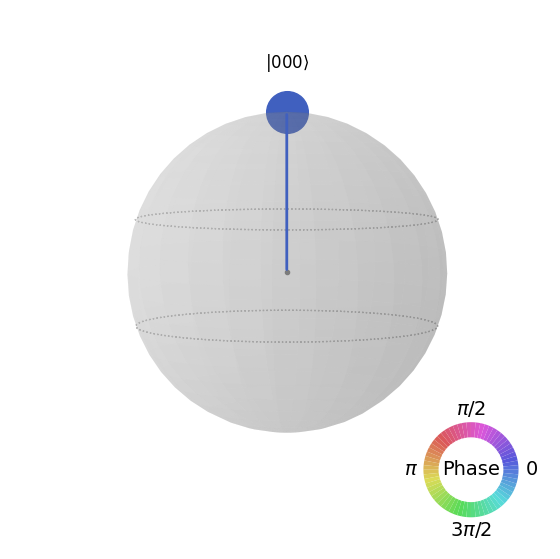

In [51]:
plot_state_qsphere(res.get_statevector(qc))

In [52]:
qc.decompose().draw()

┌───┐      »
   q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──»
                           │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐»
   q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├»
        ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘»
   q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────»
        └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘      »
meas: 3/═════════════════════════════════════════════════════════════»
                                                                     »
«         statevector  ░ ┌─┐      
«   q_0: ──────░───────░─┤M├──────
«              ░       ░ └╥┘┌─┐   
«   q_1: ──────░───────░──╫─┤M├───
«              ░       ░  ║ └╥┘┌─┐
«   q_2: ──────░───────░──╫──╫─┤M├
«              ░       ░  ║  ║ └╥┘
«meas: 3/═════════════════╩══╩══╩═
«                         0  1  2

### Swap gate

used to swap the 2 qubits values

In [54]:
qc = QuantumCircuit(2)

qc.x(1)
qc.swap(0,1)
qc.save_statevector()
qc.measure_all() # measure all qubits and send res to classical bits
simulator = AerSimulator()
res = simulator.run(qc, shots=1024).result()
counts = res.get_counts()
img = qc.draw()

In [58]:
counts

{'01': 1024}

In [59]:
img

statevector  ░ ┌─┐   
   q_0: ──────X───────░───────░─┤M├───
        ┌───┐ │       ░       ░ └╥┘┌─┐
   q_1: ┤ X ├─X───────░───────░──╫─┤M├
        └───┘         ░       ░  ║ └╥┘
meas: 2/═════════════════════════╩══╩═
                                 0  1

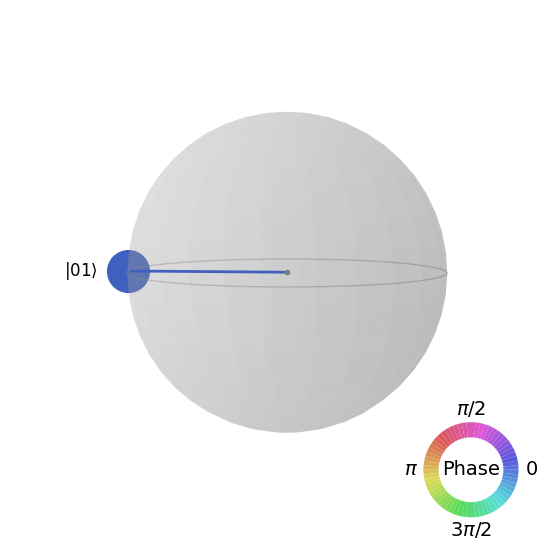

In [55]:
plot_state_qsphere(res.get_statevector(qc))